# Projet Histogram of oriented gradient

ref : https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi, atan2
import cv2
import itertools
from scipy.ndimage.interpolation import shift

## 1 :  Preprocess the Data

We need to preprocess the image and bring down the width to height ratio to 1:2. The image size should preferably be 64 x 128. This is because we will be dividing the image into 8x8 and 16x16 patches to extract the features. Having the specified size (64 x 128) will make all our calculations pretty simple. In fact, this is the exact value used in the original paper.

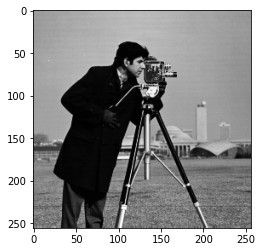

taille de l'image :  (256, 256)


In [2]:
# faut mettre votre path !!

path_base = './Image/'
image = cv2.imread(path_base+'cameraman.tif',0) 

plt.imshow(image,'gray')
plt.show()
print("taille de l'image : ", image.shape)

In [3]:
dsize= (64,128)
image_resized = cv2.resize(image, dsize, interpolation = cv2.INTER_AREA)

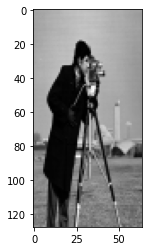

taille de l'image :  (128, 64)


In [4]:
plt.imshow(image_resized,'gray')
plt.show()
print("taille de l'image : ", image_resized.shape)

## 2 : Calculating Gradients (direction x and y)

The next step is to calculate the gradient for every pixel in the image. Gradients are the small change in the x and y directions.

To determine the gradient (or change) in the x-direction, we need to subtract the value on the left from the pixel value on the right. Similarly, to calculate the gradient in the y-direction, we will subtract the pixel value below from the pixel value above the selected pixel.

This process will give us two new matrices – one storing gradients in the x-direction and the other storing gradients in the y direction. 

In [5]:
masque = np.array([[-1,0,1]])

In [ ]:
"""
def matrice_x(img, h):
    h_rows,h_cols=h.shape
    h = h.reshape((-1,))
    rows,cols = img.shape
    large_img = np.stack([shift(img.astype(np.float32),(i-h_rows//2,j-h_cols//2),cval=np.NaN) for i,j in itertools.product(range(h_rows),range(h_cols))],axis=-1)
    return np.dot(large_img,h).astype(np.uint8)
    
def matrice_y(img, h):
    return matrice_x(img, h.T)

In [20]:
def convolve_x(img, h):
    return cv2.filter2D(img, -1, h)

def convolve_y(img, h):
    return cv2.filter2D(img, -1, h.T)

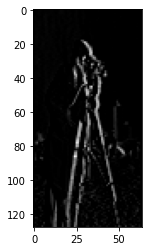

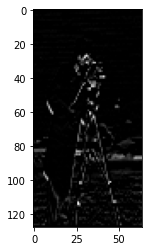

In [44]:
plt.imshow(convolve_x(image_resized, masque), 'gray')
plt.show()
plt.imshow(convolve_y(image_resized, masque), 'gray')
plt.show()

## 3 : Calculate the Magnitude and Orientation

For this step, we will be using the Pythagoras theorem (ça rappel pleins de souvenirs <3). Voir sur le site internet ça explique bien. Voici les formules : 


Total Gradient Magnitude =  √[(Gx)2+(Gy)2]

Φ = atan(Gy / Gx)

In [74]:
from numpy import arctan2

def magnitude_and_orientation(img):
    masque = np.array([[-1,0,1]])
    gx = convolve_x(img, masque)
    gy = convolve_y(img, masque.T)
    
    magnitude = np.sqrt(gx**2 + gy**2)
    orientation = (arctan2(gy, gx) * 180 / np.pi) % 360
    
    print(np.unique(magnitude))
    print(np.unique(orientation))
    
    return magnitude, orientation

In [47]:
def mag_or(img):
    masque = np.array([[-1,0,1]])
    Mx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
    My = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)

    mag, angle = cv2.cartToPolar(Mx, My, angleInDegrees=True)
    
    return mag, angle

So now, for every pixel value, we have the total gradient (magnitude) and the orientation (direction). We need to generate the histogram using these gradients and orientations.

## 4 : Calculate Histogram of Gradients in 8×8 cells (9×1)

In [75]:
hist_bins = np.array([0,20,40,60,80,100,120,140,160])
hist = np.zeros(9)
m, o = magnitude_and_orientation(image_resized)
rows,cols = image_resized.shape
for i in range(rows):
    for j in range(cols) :
        hist[int(np.floor(o[i][j]/20))] =+ m[i][j]

TypeError: only size-1 arrays can be converted to Python scalars

In [65]:
hist

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])